#**기계학습 기말 프로젝트** 
2017131219 윤정인

# 1. 실험 내용에 대한 전체 요약

고객 서비스 해지 여부를 예측하는 것으로, 각 고객별 다양한 특성들을 기반으로 binary classifcation을 진행하였다. 데이터 전처리는 Label Encoding, normalization, 결측값 대체, 불필요한 feature 제거 등으로 이루어졌다. 데이터의 선형성 여부를 비교하기 위해 Logistic Regression, MLP, RandomForest의 세 모델을 사용하였다. 실험은 feature selection을 하지 않은 상태와 featue selection을 모델 기반 특성 선택과, 반복적 특성 선택 두가지 방식을 진행한 후에 GidSerachCV를 이용해 최적화 모델을 생성하여 진행하였다. 이 데이터는 class가 imbalanced 되어있기 때문에 성능을 accuracy만으로 판단하기 힘들어 confusion matrix, f1_score, ROC, AUC 등을 활용하여 성능 비교 분석을 진행하였다.


실험 분석 결과, 세가지 실험(no feature selection, model based feature selection, iterative feature selection)에서 Logistic Regression이 평균적으로 가장 높은 성능을 보여주었다. 그리고 RandomForest 모델의 경우는 model based feature selection 이후 상대적으로 큰 성능 향상을 보여주었다. 그리고 feature의 수를 19개에서 15개, 10개로 줄여가며 진행했을 때, 10개로 줄였을 때 나머지 두 모델과는 달리 MLP는 AUC 측면에서의 성능 향상을 보여주었다. 

# 2. 선정한 데이터에 대한 설명 및 데이터 url

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, roc_curve, roc_auc_score, auc

In [ ]:
data_url='https://raw.githubusercontent.com/wjddls0828/yjiproject/master/Telco-Customer-Churn.csv'
df=pd.read_csv(data_url)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



**1. 선정한 데이터 url:** 
https://www.kaggle.com/blastchar/telco-customer-churn
<br><br>
**2. 데이터 설명**<br>
  'telco-customer-churn'은 고객들의 특성별 가입 고객 해지 여부를 나타내는 데이터이다. 20개의 feature와 7043개의 instance로 구성되어 있다. 'Churn' 컬럼이 고객의 서비스 해지 여부를 나타내는 클래스로 yes, no의 binary classification을 진행할 수 있는 데이터이다. 주의해야 할 점은 이 데이터는 target class인 Churn 여부가 no의 instance는 5174개, yes는 1869개이므로 성능을 확인할 때 단순 accuracy로 확인하지 않고, f1score, confusion matrix 분석 등의 다양한 방식을 진행해야 한다. 
<br><br>

**3. 데이터 column 설명**
  * 'customerID': 고객 ID
    * male: 50%<br>female: 50%
  * 'gender': 고객 성별
  * 'SeniorCitizen': senior citizen 여부
  * 'Partner': partner 존재 여부
  * 'Dependents': dependents 존재 여부
  * 'tenure': 회사에 머문 개월
  * 'PhoneService': phone servive 받는지 여부
  * 'MultipleLines': multiple line 소유 여부
    * values: (Yes, No, No phone service)
    * no: 48%<br>yes: 42%<br>other: 10%
  * 'InternetService': 고객의 인터넷 서비스 제공자
    * values: (DSL, Fiber optic, No)
    * Fiber optic: 44%<br>DSL: 34%<br>other: 22%
  * 'OnlineSecurity': 고객이 online security를 가지고 있는지 여부
    * values:(Yes, No, No internet service)
    * No: 50%<br>Yes: 29%<br>Other: 22%
  * 'OnlineBackup': 고객의 online backup 소유 여부
    * values: (Yes, No, No internet service)
    * No: 44%<br>Yes: 34% <br>Other: 22%
  * 'DeviceProtection': 고객의 device protection 소유 여부
    * values: (Yes, No, No internet service)
    * No: 44%<br>Yes: 34% <br>Other: 22%
  * 'TechSupport': tech support 소유 여부
    * values: (Yes, No, No internet service)
    * No: 49%<br>Yes: 29%<br>Other: 22%
  * 'StreamingTV': TV 스트리밍여부
    * values: (Yes, No, No internet service)
    * No: 40% <br> Yes: 38% <br>other: 22%
  * 'StreamingMovies': 영화 스트리밍 여부
    * values:  (Yes, No, No internet service)
    * No: 40%<br> Yes: 39%<br>Other: 22%
  * 'Contract': 고객의 계약 기간
    * values: (Month-to-month, One year, Two year)
    * Month-to-month: 55% <br>Two year: 24% <br>Other: 21%
  * 'PaperlessBilling':고객의 paperless billing 소유 여부
    * values: (Yes, No)
  * 'PaymentMethod': 고객의 지불 수단
    * values: (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
    * Electronic check: 34% <br> Mailed check: 23%
  * 'MonthlyCharges': 고객에게 월별로 청구되는 금액
  * 'TotalCharges': 고객에게 청구되는 총 금액




In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# 3. 실험 진행


##3-1) 데이터 전처리



1. object type인 feature들을 LabelEncoder를 사용해서 정수형으로 인코딩을 
해주었다. 그리고 TotalCharges의 경우 이미 데이터가 실수값이 들어가있음에도 dtype이 object이므로 해당 컬럼은 float형으로 따로 변환을 진행하였다.


2. Totalchages 컬럼에는 결측값이 존재하였는데, 이를 해당 컬럼의 평균값으로 대체하는 처리를 진행하였다.

3. tenure,MonthlyCharges	TotalCharges의 feature의 경우는 모두 numeric 값인데 값의 범위가 차이가 있기에 StandardScaler를 활용해서 normalization을 시켜주었다.

4. customerID feature는 개별 고객을 식별할 수 있는 Identification number이기 때문에 ID code problem을 야기하여 overfitting을 유발할 수 있는 feature임으로 X data로부터 제거하였다.



In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# object type인 feature를 정수형으로 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
list1=['customerID', 'gender', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod','Churn']
for x in list1:
  df.loc[:,x]=le.fit_transform(df.loc[:,x])

In [ ]:
# object type인 columns을 float로 타입 변경
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [ ]:
df.dtypes

customerID            int64
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [ ]:
# TotalCharges에 결측값 존재 확인
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# 결측치를 그 column의 평균으로 대체
df.fillna(df.mean(),inplace=True)

In [ ]:
# 결측치 제거됨 확인
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# tenure,MonthlyCharges	TotalCharges는 범위가 다른 continuous값이므로 스케일 조정(normalization)
df[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [ ]:
df_pre_norm=df[['tenure','MonthlyCharges','TotalCharges']]

In [ ]:
df_pre_norm.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [ ]:
df.drop(['tenure','MonthlyCharges','TotalCharges'], axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
result= scaler.fit_transform(df_pre_norm)
df_norm=pd.DataFrame(data=result, columns=df_pre_norm.columns)

In [ ]:
df_norm.describe()

,tenure,MonthlyCharges,TotalCharges
count,7.043000e+03,7.043000e+03,7.043000e+03
mean,5.945991e-17,-8.291599e-17,7.358400e-17
std,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.318165e+00,-1.545860e+00,-9.998503e-01
25%,-9.516817e-01,-9.725399e-01,-8.305558e-01
50%,-1.372744e-01,1.857327e-01,-3.897629e-01
75%,9.214551e-01,8.338335e-01,6.637555e-01
max,1.613701e+00,1.794352e+00,2.826469e+00


In [ ]:
pro_df = pd.concat([df,df_norm],axis=1)

In [ ]:
pro_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn', 'tenure', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [ ]:
#customerID는 unique ID code이므로 부적절한 feature이다. 따라서 제거한다.
pro_df.drop(['customerID'], axis=1, inplace=True)

In [ ]:
pro_df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,-1.277445,-1.160323,-0.994971
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,0.066327,-0.259629,-0.173876
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,-1.236724,-0.362660,-0.960399
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,0.514251,-0.746535,-0.195400
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,-1.236724,0.197365,-0.941193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0,-0.340876,0.665992,-0.129281
7039,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0,1.613701,1.277533,2.242808
7040,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0,-0.870241,-1.168632,-0.855182
7041,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1,-1.155283,0.320338,-0.872777


### 훈련, 테스트 데이터 분리

'Churn' column이 예측하고자 하는 target class이므로 이를 y data로 나머지 feature들을 x data로 분리한다. X data에는 총 19개의 feature가 존재하고, 총 7043개의 instance가 존재한다.

train set과 test set으로 split을 진행한다. x_train data에는 4930개의 instance가 있고, x_test에는 2113개의 instance가 존재한다.

In [ ]:
y = pro_df[['Churn']].to_numpy().ravel()
x = pro_df.drop(columns=['Churn'])
# churn: 0=no, 1=yes

In [ ]:
x.shape

(7043, 19)

In [ ]:
pro_df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

--> Dataset이 imbalanced 되어있으므로 단순한 accuracy가 아니라 F-measure로 정확도를 판별해야한다.

In [ ]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)

In [ ]:
x_train.shape

(4930, 19)

In [ ]:
x_test.shape

(2113, 19)

## 3-2) Feature selection 없이 진행

### 3-2.1) Logistic Regression

모델 선정 이유: 해당 데이터가 feature space에서 선형의 모양을 갖는지 확인하기 위해서 선택하였다. 이를 이후 MLP와 RandomForest와 비교하여 선형 혹은 비선형의 적합성을 판별할 것이다.

#### Default 모델 확인

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
print(model.score(x_test, y_test))

0.8021769995267393


#### Grid Search CV를 통해 hyperparameter tuning

10 fold로 설정한 후 GridSearch로 cross validation을 진행하였다. 그 결과 highest score를 가진 estimator의 parameter는 C=10, penalty='l1', solver='liblinear'이었고, 이것의 cross validation score의 평균은 0.8024340770791074이었다.default model보다 약간 향상된 모습을 보인다. 그러나 이것은 cross validation의 성능이므로 구체적인 성능비교는 이후 test set으로 진행할 것이다.

In [ ]:
log_model_before = LogisticRegression()
params_log_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 500, 1000, 2500, 5000]
    }
]
cv_grid=KFold(n_splits=10)
clf_before = GridSearchCV(log_model_before, param_grid = params_log_grid, cv = cv_grid, verbose=1)
best_clf_before = clf_before.fit(x_train,y_train)

In [ ]:
print("highest score를 가진 estimator: ",best_clf_before.best_estimator_)
print("Mean cross-validated score of the best_estimator:",best_clf_before.best_score_)
print("cross validation split 개수:",best_clf_before.n_splits_)

highest score를 가진 estimator:  LogisticRegression(C=10, penalty='l1', solver='liblinear')
Mean cross-validated score of the best_estimator: 0.8024340770791074
cross validation split 개수: 10


#### Optimized model 생성

GridSearch cross validation을 통해 선정한 best parameter를 통해 최적의 모델을 생성하고 훈련을 진행하였다.test set을 이용해서 성능을 다양한 평가지표를 통해 확인해보았다. default model의 accuracy가 0.8021769995267393이었고, 최적화한 모델의 accuracy는 0.8021769995267393로 동일한 값이 나왔다. 

accuracy는 약 80.21%로 꽤 높은 값을 보이지만 imbalanced data로 인해 f1_score를 살펴보면 accuracy보다 많이 차이가 나게 낮은 59.73%인 것을 확인할 수 있다. 그리고 recall에 비해 precision이 더 높은 것을 보았을 때, 모델이 가입 해지를 예측한 고객들 중 실제 가입 해지를 할 확률은 높다고 판단할 수 있지만, 이 모델 자체가 찾은 정답값의 비율이 전체 가입 해지 고객들 중에서는 높지 않은 것으로 해석할 수 있다. 

In [ ]:
op_log_model_before = LogisticRegression(C=10, penalty='l1', solver='liblinear')
op_log_model_before.fit(x_train,y_train)
y_pred_log_before=op_log_model_before.predict(x_test)
y_prob_log_before=op_log_model_before.predict_proba(x_test)[:,1]

In [ ]:
print("Logistic Regression accuracy:",op_log_model_before.score(x_test,y_test))
print("Logistic Regression f1_score:",f1_score(y_test,y_pred_log_before))
print("recall",recall_score(y_test, y_pred_log_before))
print("precision",precision_score(y_test, y_pred_log_before))

Logistic Regression accuracy: 0.8021769995267393
Logistic Regression f1_score: 0.5973025048169558
recall 0.5626134301270418
precision 0.6365503080082136


### 3-2.2) MLP

모델 선정 이유: Logistic Regression에서 좋은 성능이 나오지 않았다. 따라서 이 데이터는 선형의 성질보다 비선형일 가능성이 높기 때문에 비선형의 모델이 MLP를 선정하였다.

#### default model 확인

In [ ]:
mlp_before = MLPClassifier()
mlp_before.fit(x_train,y_train)
print(mlp_before.score(x_test,y_test))

0.7785139611926172


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


#### GridSearchCV로 hyperparameter tuning

10 fold를 통해 GridSearch cross validation을 통해 best hyperparameter를 찾은 결과 hidden_layer_sizes=(150,), learning_rate_init=0.0001의 결과가 나왔고, 이때의 cross validated score의 평균은 0.8020283975659229이었다. 이는 default model의 성능보다 향상된 모습을 보인다. 추후 test set 비교로 더욱 정확한 성능 비교를 해볼 것이다.

In [ ]:
mlp_model_before = MLPClassifier()
params_mlp_grid = {
             'hidden_layer_sizes': [(70,),(100,),(150,)],
              'activation': ['tanh', 'relu'],
              'learning_rate_init': [0.0001,0.001]}
              
cv_grid_2=KFold(n_splits=10)
mlp_clf_bf = GridSearchCV(mlp_model_before, param_grid = params_mlp_grid, cv = cv_grid_2, verbose=1, n_jobs = -1)
best_mlp_clf_bf = mlp_clf_bf.fit(x_train,y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
print('highest score를 가진 estimator:',best_mlp_clf_bf.best_estimator_)
print('Mean cross-validated score of the best_estimator',best_mlp_clf_bf.best_score_)
print('cross validation split 개수',best_mlp_clf_bf.n_splits_)

highest score를 가진 estimator: MLPClassifier(hidden_layer_sizes=(150,), learning_rate_init=0.0001)
Mean cross-validated score of the best_estimator 0.8020283975659229
cross validation split 개수 10


#### Optimized model 생성

GridSearch cross validation을 통해 찾아낸 best parameter로 최적화된 모델을 생성하였다. 우선 accuracy가 default model의 경우 약 77.85%였지만 최적화 후 약 80.59%로 증가하였다. default model와 최적화 모델은 hidden layer size의 차이만이 존재한다. 따라서 hidden layer size증가로 정확도가 향상된 것으로 볼 수 있다. 그러나 불균형한 dataset에 의해서 f1_score은 그것보다낮은 59.64%가 나왔다. 그리고 recall보다 precision이 높게 나왔는데, 이를 통해 해당 모델이 찾은 가입 해지 고객 중 실제 가입 해지 고객의 비율은 상대적으로 높지만, 해당 모델이 전체 가입 해지 고객 중 실제 가입 해지 고객을 찾는 성능은 좋지 않다고 판단할 수 있다. 


In [ ]:
op_mlp_bf=MLPClassifier(hidden_layer_sizes=(150,), learning_rate_init=0.0001)
op_mlp_bf.fit(x_train,y_train)
y_pred_mlp_bf=op_mlp_bf.predict(x_test)
y_prob_mlp_bf = op_mlp_bf.predict_proba(x_test)[:, 1]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
print("MLP accuracy:",op_mlp_bf.score(x_test,y_test))
print("MLP f1_score:",f1_score(y_test,y_pred_mlp_bf))
print("recall",recall_score(y_test, y_pred_mlp_bf))
print("precision",precision_score(y_test, y_pred_mlp_bf))

MLP accuracy: 0.8059630856601988
MLP f1_score: 0.5964566929133858
recall 0.5499092558983666
precision 0.6516129032258065


###3-2.3) RandomForest

모델 선정 이유: logistic regression과 MLP에서 아주 좋은 성능을 이끌어내지 못했다. 따라서 비선형을 표현할 수 있는 앙상블 모델을 선정했다. 앙상블 모델을 통해 voting을 통한 결과 예측으로 좀 더 일반화된 좋은 성능을 기대해보고자 선택하였다.

#### default model 확인

In [ ]:
rf_bf= RandomForestClassifier()
rf_bf.fit(x_train, y_train)
rf_bf.score(x_test,y_test)

0.7936583057264552

#### GridSearchCV로 hyperparameter tuning

10 fold을 활용하여 GridSearchCV로 hyperparameter tuning을 한 결과 best parameter는 max_depth=12, min_samples_leaf=18, min_samples_split=3, n_estimators=10이고 그에 따른 cross validated score의 평균은 0.0.8006085192697769이었다. 이는 default model의 score에 비해 향상된 모습을 보인다. 더욱 정확한 모델의 성능 차이는 이후 test set을 통한 비교로 진행할 것이다.

In [ ]:
params_rf= { 'n_estimators' : [10, 50,100],
           'max_depth' : [6, 8, 10, 12,20],
           'min_samples_leaf' : [3, 5, 8, 12, 18, 20],
           'min_samples_split' : [3, 5, 8, 16, 20]
            }
cv_grid_3=KFold(n_splits=10)
rf_clf_bf = RandomForestClassifier()
rf_clf_cv_bf = GridSearchCV(rf_clf_bf, param_grid = params_rf, cv = cv_grid_3, n_jobs = -1, verbose=1)
best_rf_bf=rf_clf_cv_bf.fit(x_train, y_train)

Fitting 10 folds for each of 450 candidates, totalling 4500 fits


In [ ]:
print('highest score를 가진 estimator:',best_rf_bf.best_estimator_)
print('Mean cross-validated score of the best_estimator',best_rf_bf.best_score_)
print('cross validation split 개수',best_rf_bf.n_splits_)

highest score를 가진 estimator: RandomForestClassifier(max_depth=12, min_samples_leaf=18, min_samples_split=3,
                       n_estimators=10)
Mean cross-validated score of the best_estimator 0.8006085192697769
cross validation split 개수 10


#### optimized model 생성

GridSearchCV를 통해 구한 best parameter를 이용하여 최적화된 모델을 생성하였다. default model의 경우 79.36%의 accuracy를 보였지만, 최적화 이후에는 80.26%로 성능이 향상했다. max_depth를 default model은 None이었는데 12로 제한하고, min_samples_leaf와 min_samples_split을 default 값보다 증가시킴으로써 overfitting을 방지하는 효과 때문에 성능이 향상된 것으로 판단된다. 또한 estimator의 개수도 default는 100개인데, 10으로 제한하였다. 이는 100개까지의 많은 모델의 voting이 필요하지 않았음을 의미하는 것으로 판단된다. 

그리고 이 경우 역시 불균형한 dataset 때문에 f1 score가 accuracy에 비해 많이 낮은 것을 확인할 수 잇다. 그리고 recall의 경우는 약 49.36%로 굉장히 낮은데, precision은 66.34%로 상대적으로 높은 결과를 보였다. 즉, 모델의 가입 해지 예측 결과 중의 실제 가입 해지 고객의 비율이 전체 가입 해지 고객 중 모델이 맞춘 가입 해지 고객의 비율보다 높다는 것이다.

In [ ]:
op_rf_bf=RandomForestClassifier(max_depth=12, #default=None
                                min_samples_leaf=18, #default=1
                                min_samples_split=3, #default=2
                                n_estimators=10) #default=100

op_rf_bf.fit(x_train,y_train)
y_pred_rf_bf=op_rf_bf.predict(x_test)
y_prob_rf_bf = op_rf_bf.predict_proba(x_test)[:, 1]

In [ ]:
print("랜덤포레스트 accuracy:",op_rf_bf.score(x_test,y_test))
print("랜덤포레스트 f1_score:",f1_score(y_test,y_pred_rf_bf))
print("recall",recall_score(y_test, y_pred_rf_bf))
print("precision",precision_score(y_test, y_pred_rf_bf))

랜덤포레스트 accuracy: 0.8026502602934217
랜덤포레스트 f1_score: 0.5660770031217482
recall 0.49364791288566245
precision 0.6634146341463415


### Confusion Matrix



*   Churn no=0
*   Churn yes=1

logistic regression, mlp, randomforest 모두에서 dataset이 no의 instance가 yes의 비해 많은 불균형 상태를 보이기 때문에 confusion matrix에서 좌상단(즉 맞춘 negative(0))의 값이 0.66~0.67로 큰 비율을 보이는 것을 확인할 수 있다. 데이터의 불균형으로 negative(0)를 positive(1)보다 잘 찾는 방향으로 모델이 훈련된 것을 해석해볼 수 있다.



In [ ]:
def plot_cm(labels, predictions):
  cm = confusion_matrix(labels, predictions)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


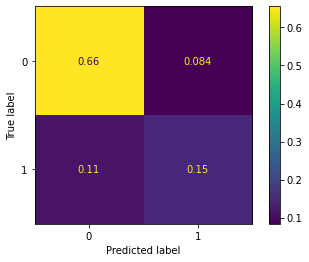

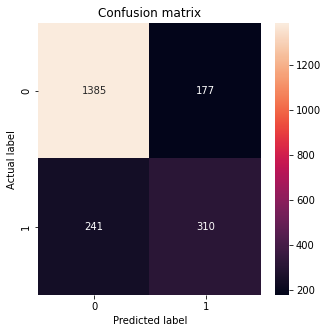

In [ ]:
#logistic regression 
confusion_matrix(y_test, y_pred_log_before)
plot_confusion_matrix(op_log_model_before, x_test, y_test, normalize='all')
plot_cm(y_test, y_pred_log_before)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


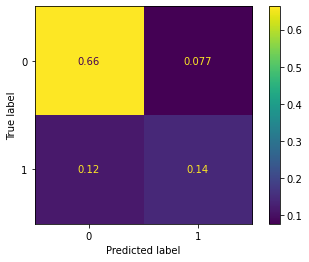

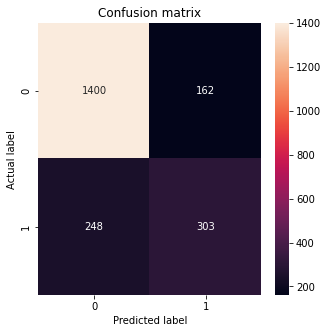

In [ ]:
# mlp 
confusion_matrix(y_test, y_pred_mlp_bf)
plot_confusion_matrix(op_mlp_bf, x_test, y_test, normalize='all')
plot_cm(y_test, y_pred_mlp_bf)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


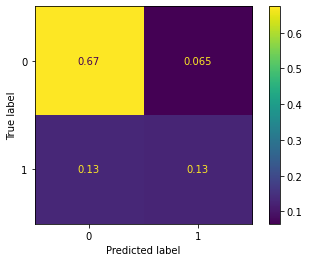

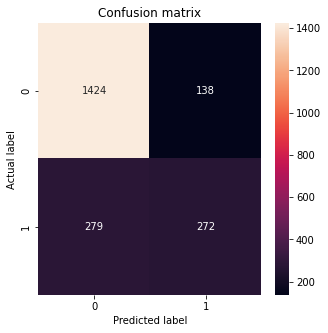

In [ ]:
# RandomForest
confusion_matrix(y_test, y_pred_rf_bf)
plot_confusion_matrix(op_rf_bf, x_test, y_test, normalize='all')
plot_cm(y_test, y_pred_rf_bf)

### 세 모델 비교

비선형 모델(MLP,RandomForest)와 선형의 모델(Logistic Regression)이 다양한 measure의 결과값이 비슷한 것을 보아 이 data는 linear의 특성을 갖는 것으로 유추해볼 수 있다. 

랜덤 포레스트는 매우 차원이 높은 데이터에는 잘 동작하지 않는 한계가 있어 AUC 와 f1에서의 성능이 세 모델 중 가장 좋지 않게 나왔다. RandomForest는 feature selection을 통해 feature space를 단순화 시킨 후에 성능 향상을 기대해볼 수 있을 것이다.

#### ROC, AUC

feature selection 이전의 ROC 커브를 통한 AUC score를 비교해보면, 세 모델이 유사한 값을 가지지만, 그중에서도 Logistic Regression이 가장 좋은 성능을, RandomForest가 가장 좋지 않은 성능을 보인다. 

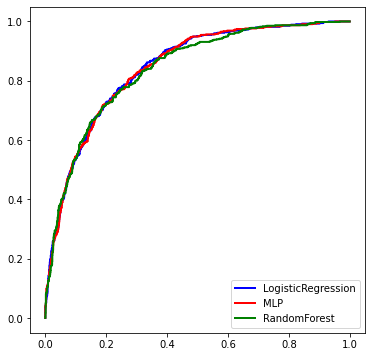

logistic regression AUC score 0.8448566336145898
MLP AUC score 0.8438876120939464
RandomForest AUC score 0.8391557893807325


In [ ]:
plt.figure(figsize=(6,6))

lr_fp,lr_tp,mlp_ =roc_curve(y_test, y_prob_log_before)
mlp_fp,mlp_tp,mlp_ =roc_curve(y_test, y_prob_mlp_bf)
rf_fp,rf_tp,rf_ =roc_curve(y_test, y_prob_rf_bf)
 
plt.step(lr_fp, lr_tp, color='blue', lw=2)
plt.step(mlp_fp, mlp_tp, color='red', lw=2)
plt.step(rf_fp, rf_tp, color='green', lw=2)

plt.legend(['LogisticRegression','MLP','RandomForest'])
plt.show()

print("logistic regression AUC score",roc_auc_score(y_test, y_prob_log_before))
print("MLP AUC score",roc_auc_score(y_test, y_prob_mlp_bf))
print("RandomForest AUC score",roc_auc_score(y_test, y_prob_rf_bf))

#### accuracy, f1_score

imbalanced data이므로 f1 score를 중점적으로 세 모델을 비교해보면 랜덤포레스트 모델이 성능이 가장 좋지 않게 나오고, 선형모델인 Logistic Regression과 비선형 모델인 MLP는 f1_score가 비슷하게 나왔다. 

In [ ]:
print("Logistic Regression accuracy:",op_log_model_before.score(x_test,y_test))
print("Logistic Regression f1_score:",f1_score(y_test,y_pred_log_before))
print('\n')
print("MLP accuracy:",op_mlp_bf.score(x_test,y_test))
print("MLP f1_score:",f1_score(y_test,y_pred_mlp_bf))
print('\n')
print("랜덤포레스트 accuracy:",op_rf_bf.score(x_test,y_test))
print("랜덤포레스트 f1_score:",f1_score(y_test,y_pred_rf_bf))

Logistic Regression accuracy: 0.8021769995267393
Logistic Regression f1_score: 0.5973025048169558


MLP accuracy: 0.8059630856601988
MLP f1_score: 0.5964566929133858


랜덤포레스트 accuracy: 0.8026502602934217
랜덤포레스트 f1_score: 0.5660770031217482


## 3-3) Feature selection 진행

### feature selection: 모델 기반 특성 선택

모델 기반 특성 선택으로 중요한 특성들을 선택한다. SelectFromModel을 사용하였다.이 때 threshold는 median으로 했을 때 default model logistic  regression에서의 정확도가 feature selection 이전보다 낮아지는 것을 확인한 후 0.7로 조정하였다.<br>
feature selection 후 x data: x_train_selected, x_test_selected

제거된 feature: Dependents, PhoneService, StreamingTV, StreamingMovies

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='0.7*median')

select.fit(x_train, y_train)
x_train_selected = select.transform(x_train)
print("x_train.shape:", x_train.shape)
print("x_train_selected.shape:", x_train_selected.shape)

x_train.shape: (4930, 19)
x_train_selected.shape: (4930, 15)


Text(0.5, 0, 'featue number')

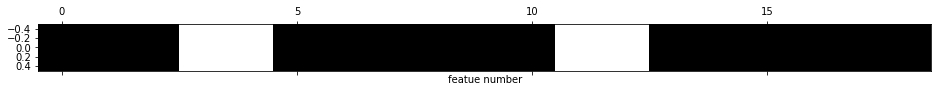

In [ ]:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("featue number")

In [ ]:
x_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [ ]:
mask

array([ True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True])

In [ ]:
x_test_selected = select.transform(x_test)

### 3-3.1) LogisticRegression

#### Grid Search CV를 통해 hyperparameter tuning

In [ ]:
log_model = LogisticRegression()

In [ ]:
params_log_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 500, 1000, 2500, 5000]
    }
]
cv_grid=KFold(n_splits=10)

In [ ]:
clf = GridSearchCV(log_model, param_grid = params_log_grid, cv = cv_grid, verbose=1)

In [ ]:
best_clf = clf.fit(x_train_selected,y_train)

In [ ]:
# highest score를 가진 estimator 
best_clf.best_estimator_

LogisticRegression(C=1e-05, penalty='none', solver='sag')

In [ ]:
# Mean cross-validated score of the best_estimator
best_clf.best_score_

0.8006085192697767

In [ ]:
#cross validation split 개수
best_clf.n_splits_

10

#### Optimized Model 생성

이 경우도 역시accuracy는 높게 나오지만, 데이터가 불균형하기 때문에 f1_score이 그에 비에 낮은 것을 확인할 수 있다.


feature selection을 하지 않고 gridsearch cv로 optimized 모델을 생성했던 것과 비교해보면 아주 작은 차이로 성능이 증가한 것을 확인할 수 있다. accuracy는 0.8021769995267393에서0.8050165641268339로 증가하였고, f1 score는 0.5973025048169558에서 0.59765625로 증가하였다. 또한 recall은 0.5626134301270418에서 0.5553539019963702로 감소하였고, precision은  0.6365503080082136에서 0.6469344608879493로 약간 증가하였다. 

즉, f1 측면에서 본다면 feature selection을 통해 약간의 성능 향상이 이루어졌다고 할 수 있다. 그러나 뒤에 AUC 분석을 보면, feature selection 전보다 성능이 낮아지는 결과를 확인할 수 있는데, f1 score보다 더욱 큰 폭으로 성능이 향상된다. 따라서 이 둘을 종합해보았을 때, feature selection을 통해 relevant한 feature가 제거되어 모델의 성능이 떨어진 것이라고 할 수 있다.

In [ ]:
op_log_model = LogisticRegression(C=1e-05, penalty='none', solver='sag')

In [ ]:
op_log_model.fit(x_train_selected,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


LogisticRegression(C=1e-05, penalty='none', solver='sag')

In [ ]:
y_pred=op_log_model.predict(x_test_selected)

In [ ]:
y_prob_log = op_log_model.predict_proba(x_test_selected)[:, 1]

In [ ]:
print("accuracy:",op_log_model.score(x_test_selected,y_test))
print("f1_score:",f1_score(y_test,y_pred))
print("recall",recall_score(y_test, y_pred))
print("precision",precision_score(y_test, y_pred))

accuracy: 0.8050165641268339
f1_score: 0.59765625
recall 0.5553539019963702
precision 0.6469344608879493


### 3-3.2) MLP

#### GridSearchCV로 Hyperparameter tuning

In [ ]:
mlp_model = MLPClassifier()

In [ ]:
params_mlp_grid = {
              'hidden_layer_sizes': [(70,),(100,),(150,)],
              'activation': ['tanh', 'relu'],
              'learning_rate_init': [0.0001,0.001]}
cv_grid_2=KFold(n_splits=10)

In [ ]:
mlp_clf = GridSearchCV(mlp_model, param_grid = params_mlp_grid, cv = cv_grid_2, verbose=1, n_jobs = -1)

In [ ]:
best_mlp_clf = mlp_clf.fit(x_train_selected,y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
print('highest score를 가진 estimator:',best_mlp_clf.best_estimator_)
print('Mean cross-validated score of the best_estimator',best_mlp_clf.best_score_)
print('cross validation split 개수',best_mlp_clf.n_splits_)

highest score를 가진 estimator: MLPClassifier(hidden_layer_sizes=(150,), learning_rate_init=0.0001)
Mean cross-validated score of the best_estimator 0.8028397565922921
cross validation split 개수 10


#### optimized mlp model 생성

 feature selection을 하지 않은 MLP 모델과 비교해봤을 때, accuracy, f1_score, recall은 모두 감소한 것으로 보인다.(precision의 경우  0.6516129032258065에서 0.65625로 미세한 차이로 증가하였다.)  feature selection을 하지 않았을 때의 모델과 feature selection 이후의 모델이 동일한 parameter를 갖는 것을 볼 때, 이는 온전히 data의 영향인 것으로 파악된다. 즉 feature selection을 통해 제거한 feature 중 class와 relevant한 feature가 있다는 것을 유추해볼 수 있다. 


In [ ]:
op_mlp=MLPClassifier(hidden_layer_sizes=(150,), learning_rate_init=0.0001)
op_mlp.fit(x_train_selected,y_train)
y_pred_mlp=op_mlp.predict(x_test_selected)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
y_prob_mlp = op_mlp.predict_proba(x_test_selected)[:, 1]

In [ ]:
print("accuracy:",op_mlp.score(x_test_selected,y_test))
print("f1_score:",f1_score(y_test,y_pred_mlp))
print("recall",recall_score(y_test, y_pred_mlp))
print("precision",precision_score(y_test, y_pred_mlp))

accuracy: 0.8054898248935163
f1_score: 0.5885885885885886
recall 0.5335753176043557
precision 0.65625


### 3-3.3) RandomForest

#### GridSearchCV로 hyperparameter tuning

In [ ]:
params_rf= { 'n_estimators' : [10, 50,100],
           'max_depth' : [6, 8, 10, 12,20],
           'min_samples_leaf' : [3, 5, 8, 12, 18, 20],
           'min_samples_split' : [3, 5, 8, 16, 20]
            }
cv_grid_3=KFold(n_splits=10)

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf_cv = GridSearchCV(rf_clf, param_grid = params_rf, cv = cv_grid_3, n_jobs = -1, verbose=1)
best_rf=rf_clf_cv.fit(x_train_selected, y_train)

Fitting 10 folds for each of 450 candidates, totalling 4500 fits


In [ ]:
print('highest score를 가진 estimator:',best_rf.best_estimator_)
print('Mean cross-validated score of the best_estimator',best_rf.best_score_)
print('cross validation split 개수',best_rf.n_splits_)

highest score를 가진 estimator: RandomForestClassifier(max_depth=8, min_samples_leaf=20, min_samples_split=3)
Mean cross-validated score of the best_estimator 0.7995943204868154
cross validation split 개수 10


#### Optimized RandomForest Model 생성

 feature selection 이전과 비교하여 feature selection 후에 최적화된 모델의 accuracy, f1_score, recall, precision은 모두 증가하였다. 즉, feature selection 이후 성능 향상을 보였다고 할 수 있다. logistic regression과 mlp에서는 feature selection 이후 성능이 감소하는 모습이 보였는데, randomforest의 경우는 성능이 더 큰 폭으로 향상하였다. randomforest model은 여러개의 decision tree의 voting을 통해 예측의 결과를 내므로 중요한 feature들의 특성을 다른 모델들보다 더욱 잘 찾아내어 성능이 좋다고 판단된다. 즉, 랜덤 포레스트는 매우 차원이 높은 데이터에는 잘 동작하지 않는 한계가 있어 feature selection을 통해 feature space를 단순화 시킨 후에 성능 향상을 기대할 수 있다는 가설에 맞는 결과를 도출해낼 수 있었다.

 또한, feature selection 전의 최적화된 모델보다 max_depth를 줄이고, min_samples_leaf를 늘림으로써 overfitting을 방지할 수 있고, estimator의 개수가 10개에서 100개로 증가함으로써 generalization 성능이 좋아졌다고 할 수 있다.

In [ ]:
op_rf=RandomForestClassifier(max_depth=8, min_samples_leaf=20, min_samples_split=3)
op_rf.fit(x_train_selected,y_train)
y_pred_rf=op_rf.predict(x_test_selected)

In [ ]:
y_prob_rf = op_rf.predict_proba(x_test_selected)[:, 1]

In [ ]:
print("accuracy:",op_rf.score(x_test_selected,y_test))
print("f1_score:",f1_score(y_test,y_pred_rf))
print("recall",recall_score(y_test, y_pred_rf))
print("precision",precision_score(y_test, y_pred_rf))

accuracy: 0.8059630856601988
f1_score: 0.5799180327868853
recall 0.5136116152450091
precision 0.6658823529411765


### Confusion Matrix 확인

feature selection 전과 동일한 모습을 보이기에 동일한 분석으로 해석될 수 있다.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


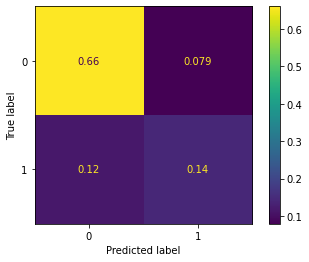

In [ ]:
#logistic regression 
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(op_log_model, x_test_selected, y_test, normalize='all')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


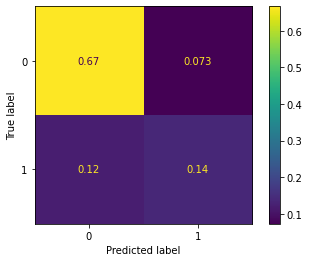

In [ ]:
# mlp 
confusion_matrix(y_test, y_pred_mlp)
plot_confusion_matrix(op_mlp, x_test_selected, y_test, normalize='all')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


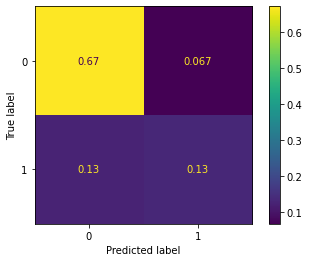

In [ ]:
# RandomForest
confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(op_rf, x_test_selected, y_test, normalize='all')

### 세 모델 비교

random forest는 feature selection 이전에 세 모델 중 가장 성능이 낮은 것으로 나타났지만, feature selection 이후 성능 향상 정도가 높아 AUC와 accuracy 측면에서 세 모델 중 좋은 성능을 보인다. 이는 RandomForest가 높은 dimension에서 한계가 있다는 특징 때문으로 추측된다. 즉, feature selection을 통해 feature space의 dimension을 줄였더니 random forest 성능이 좋아진 것으로 유추해볼 수 있다. MLP와 Logistic Regression에 비해 RandomForest가 단순화된 feature space에서 좋은 성능 향상을 보이는 것을 확인해볼 수 있다.

#### ROC, AUC 비교

RCO 커브를 통한 AUC score를 확인해보면 RandomForest가 성능이 가장 좋고, MLP가 score이 가장 낮다. 


feature selection 이전과 비교하면, MLP와 Logistic Regression의 AUC score는 감소하였고, RandomForest의 score만 증가하였다. 


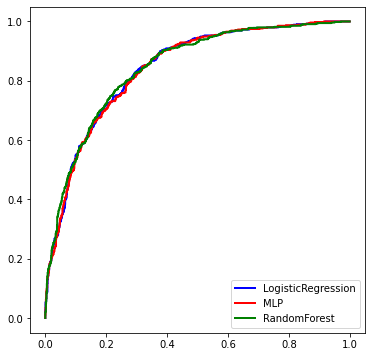

logistic regression AUC score 0.8422807095003613
MLP AUC score 0.8406133882987745
RandomForest AUC score 0.8444185987065771


In [ ]:
plt.figure(figsize=(6,6))

lr_fp,lr_tp,mlp_ =roc_curve(y_test, y_prob_log)
mlp_fp,mlp_tp,mlp_ =roc_curve(y_test, y_prob_mlp)
rf_fp,rf_tp,rf_ =roc_curve(y_test, y_prob_rf)
 
plt.step(lr_fp, lr_tp, color='blue', lw=2)
plt.step(mlp_fp, mlp_tp, color='red', lw=2)
plt.step(rf_fp, rf_tp, color='green', lw=2)

plt.legend(['LogisticRegression','MLP','RandomForest'])
plt.show()

print("logistic regression AUC score",roc_auc_score(y_test, y_prob_log))
print("MLP AUC score",roc_auc_score(y_test, y_prob_mlp))
print("RandomForest AUC score",roc_auc_score(y_test, y_prob_rf))

#### accuracy, f1_score 비교

feature selection 이후 MLP는 f1_score가 감소하였고, Logistic Regression과 RandomForest는 f1_score가 증가하였다. (RandomForest가 더 높은 향상률을 보인다) 그리고 Logistic Regression이 가장 높은 f1_score를 보인다.

In [ ]:
print("<after feature extraction>\n")
print("Logistic Rregression accuracy:",op_log_model.score(x_test_selected,y_test))
print("Logistic Rregression f1_score:",f1_score(y_test,y_pred))
print("\n")
print("MLP accuracy:",op_mlp.score(x_test_selected,y_test))
print("MLP f1_score:",f1_score(y_test,y_pred_mlp))
print("\n")
print("Random Forest accuracy:",op_rf.score(x_test_selected,y_test))
print("Random Forest f1_score:",f1_score(y_test,y_pred_rf))

<after feature extraction>

Logistic Rregression accuracy: 0.8050165641268339
Logistic Rregression f1_score: 0.59765625


MLP accuracy: 0.8054898248935163
MLP f1_score: 0.5885885885885886


Random Forest accuracy: 0.8059630856601988
Random Forest f1_score: 0.5799180327868853


## 3-4) Feature Selection 진행 _2

### feature selection 2: 반복적 특성 선택

모델 기반 특성 선택을 통해 진행한 실험에서 랜덤 포레스트를 제외한 두 모델들이 feature selection 이전보다 큰 성능 향상을 보지 못했기 때문에 반복적 특성 선택의 방법으로 feature selection을 다시 진행해본다. 이 방법을 통해 feature 19개에서 10개로 제거를 하였다.

Text(0.5, 0, 'feature number')

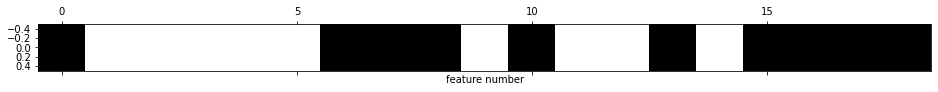

In [ ]:
from sklearn.feature_selection import RFE

# RFE를 생성
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=10)
select.fit(x_train, y_train)

# 선택된 특성을 시각화
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("feature number")

In [ ]:
x_train_rfe = select.transform(x_train)
x_test_rfe = select.transform(x_test)

In [ ]:
print(x_train.shape)
print(x_train_rfe.shape)

(4930, 19)
(4930, 10)


### Logistic Regression

In [ ]:
log_model_rfe = LogisticRegression()
clf_rfe = GridSearchCV(log_model_rfe, param_grid = params_log_grid, cv = cv_grid, verbose=1)
best_clf_rfe = clf_rfe.fit(x_train_rfe,y_train)

In [ ]:
print('highest score를 가진 estimator:',best_clf_rfe.best_estimator_)
print('Mean cross-validated score of the best_estimator',best_clf_rfe.best_score_)
print('cross validation split 개수',best_clf_rfe.n_splits_)

highest score를 가진 estimator: LogisticRegression(C=1e-05, penalty='none')
Mean cross-validated score of the best_estimator 0.7955375253549696
cross validation split 개수 10


In [ ]:
op_log_model_rfe = LogisticRegression(C=1e-05, penalty='none')
op_log_model_rfe.fit(x_train_rfe,y_train)
y_pred_rfe=op_log_model_rfe.predict(x_test_rfe)
y_prob_log_rfe = op_log_model_rfe.predict_proba(x_test_rfe)[:, 1]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


In [ ]:
print("accuracy:",op_log_model_rfe.score(x_test_rfe,y_test))
print("f1_score:",f1_score(y_test,y_pred_rfe))

accuracy: 0.7979176526265973
f1_score: 0.5866408518877058
recall 0.5499092558983666
precision 0.6286307053941909


### MLP

In [ ]:
mlp_model_rfe = MLPClassifier()
mlp_clf_rfe = GridSearchCV(mlp_model_rfe, param_grid = params_mlp_grid, cv = cv_grid_2, verbose=1, n_jobs = -1)
best_mlp_clf_rfe = mlp_clf_rfe.fit(x_train_rfe,y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
print('highest score를 가진 estimator:',best_mlp_clf_rfe.best_estimator_)
print('Mean cross-validated score of the best_estimator',best_mlp_clf_rfe.best_score_)
print('cross validation split 개수',best_mlp_clf_rfe.n_splits_)

highest score를 가진 estimator: MLPClassifier(activation='tanh', hidden_layer_sizes=(70,))
Mean cross-validated score of the best_estimator 0.7959432048681541
cross validation split 개수 10


In [ ]:
op_mlp_rfe=MLPClassifier(activation='tanh', hidden_layer_sizes=(70,))
op_mlp_rfe.fit(x_train_rfe,y_train)
y_pred_mlp_rfe=op_mlp_rfe.predict(x_test_rfe)
y_prob_mlp_rfe = op_mlp_rfe.predict_proba(x_test_rfe)[:, 1]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
print("accuracy:",op_mlp_rfe.score(x_test_rfe,y_test))
print("f1_score:",f1_score(y_test,y_pred_mlp_rfe))
print("recall",recall_score(y_test, y_pred_mlp_rfe))
print("precision",precision_score(y_test, y_pred_mlp_rfe))

accuracy: 0.8054898248935163
f1_score: 0.5835866261398176
recall 0.5226860254083484
precision 0.6605504587155964


### RandomForest

In [ ]:
rf_clf_rfe = RandomForestClassifier()
rf_clf_cv_rfe = GridSearchCV(rf_clf_rfe, param_grid = params_rf, cv = cv_grid_3, n_jobs = -1, verbose=1)
best_rf_rfe=rf_clf_cv_rfe.fit(x_train_rfe, y_train)

Fitting 10 folds for each of 450 candidates, totalling 4500 fits


In [ ]:
print('highest score를 가진 estimator:',best_rf_rfe.best_estimator_)
print('Mean cross-validated score of the best_estimator',best_rf_rfe.best_score_)
print('cross validation split 개수',best_rf_rfe.n_splits_)

highest score를 가진 estimator: RandomForestClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=5,
                       n_estimators=10)
Mean cross-validated score of the best_estimator 0.7995943204868154
cross validation split 개수 10


In [ ]:
op_rf_rfe=RandomForestClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=5,n_estimators=10)
op_rf_rfe.fit(x_train_rfe,y_train)
y_pred_rf_rfe=op_rf_rfe.predict(x_test_rfe)
y_prob_rf_rfe = op_rf_rfe.predict_proba(x_test_rfe)[:, 1]

In [ ]:
print("accuracy:",op_rf_rfe.score(x_test_rfe,y_test))
print("f1_score:",f1_score(y_test,y_pred_rf_rfe))
print("recall",recall_score(y_test, y_pred_rf_rfe))
print("precision",precision_score(y_test, y_pred_rf_rfe))

accuracy: 0.8054898248935163
f1_score: 0.5723204994797086
recall 0.49909255898366606
precision 0.6707317073170732


### ROC, AUC 확인

**<모델 기반 특성 선택과 비교 분석>**


모델 기반 특성 선택에 비해 MLP는 AUC score가 증가했지만 나머지 두 모델을 감소하였다. 이를 통해 MLP는 19개의 feature에서보다 10개의 feature에서 더욱 좋은 성능을 보이는 것을 확인할 수 있다. 모델 기반 특성 선택에서 최적화 모델의 hidden layer size보다 반복적 특성 선택에서의 hidden layer size가 더 작다. feature 개수가 줄어 hidden layer size도 작아진 것으로 판단되고, 이로 인해 더욱 모델이 단순해져서 성능이 올라간 것으로 추측된다.

랜덤포레스트의 경우는 최적화 모델이 모델 기반 특성 선택에서보다 max_depth가 깊어지고, min_sampels_split개수가 많아지고, estimator의 개수가 감소하였다. estimator의 개수가 100개에서 10개로 크게 감소한 차이가 있는데, 이 때문에 voting의 신뢰성이 감소되어 score가 낮아졌다고 추측해볼 수 있다.

logistic regression의 경우는 solver가 이전에는 multiclass에 적합한 sag로 사용되었는데, 반복적 특성 선택에서는 default 값인 lbfgs로 사용된 차이 때문에 score가 감소한 것으로 판단된다.



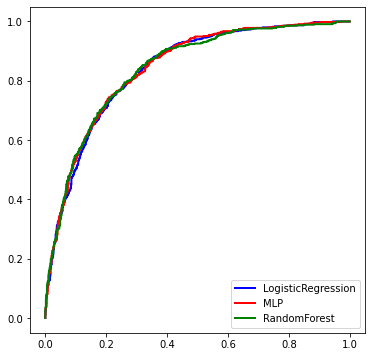

logistic regression AUC score 0.8397227947789028
MLP AUC score 0.8427913629276069
RandomForest AUC score 0.841430201403106


In [ ]:
plt.figure(figsize=(6,6))

lr_fp,lr_tp,mlp_ =roc_curve(y_test, y_prob_log_rfe)
mlp_fp,mlp_tp,mlp_ =roc_curve(y_test, y_prob_mlp_rfe)
rf_fp,rf_tp,rf_ =roc_curve(y_test, y_prob_rf_rfe)
 
plt.step(lr_fp, lr_tp, color='blue', lw=2)
plt.step(mlp_fp, mlp_tp, color='red', lw=2)
plt.step(rf_fp, rf_tp, color='green', lw=2)

plt.legend(['LogisticRegression','MLP','RandomForest'])
plt.show()

print("logistic regression AUC score",roc_auc_score(y_test, y_prob_log_rfe))
print("MLP AUC score",roc_auc_score(y_test, y_prob_mlp_rfe))
print("RandomForest AUC score",roc_auc_score(y_test, y_prob_rf_rfe))

### Accuracy, f1_score

f1 score의 경우, 세 모델 모두 모델 기반 특성 선택에서의 score보다  감소하였다. feature의 개수를 절반으로 줄이다보니 score가 감소한 것으로 판단된다. 즉, class와 relevant한 feature들까지 제거해버린 것이 원인으로 해석될 수 있다.

In [ ]:
print("LogisticRegression accuracy:",op_log_model_rfe.score(x_test_rfe,y_test))
print("LogisticRegression f1_score:",f1_score(y_test,y_pred_rfe))
print('\n')
print("MLP accuracy:",op_mlp_rfe.score(x_test_rfe,y_test))
print("MLP f1_score:",f1_score(y_test,y_pred_mlp_rfe))
print('\n')
print("RandomForest accuracy:",op_rf_rfe.score(x_test_rfe,y_test))
print("RandomForest f1_score:",f1_score(y_test,y_pred_rf_rfe))

LogisticRegression accuracy: 0.7979176526265973
LogisticRegression f1_score: 0.5866408518877058


MLP accuracy: 0.8054898248935163
MLP f1_score: 0.5835866261398176


RandomForest accuracy: 0.8054898248935163
RandomForest f1_score: 0.5723204994797086


## 결론

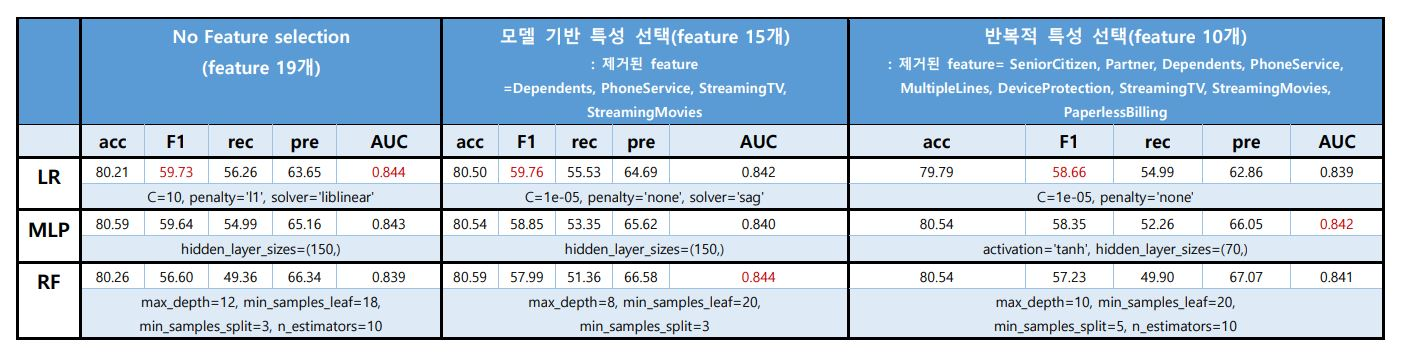


**1. Logistic Regression**


세 모델들 중 feature selection의 세가지 실험에서 평균적으로 가장 좋은 성능을 보였다. Feature selection을 하지 않았을 때 가장 좋은 성능을 보였다. F1 score와 AUC가 세 모델 중 가장 높은 값을 기록하였다. 또한 모델 기반 특성 선택을 통해 feature selection을 진행한 후 최적화된 모델은 가장 높은 f1 score을 보였고, 반복적 특성 선택을 통해 feature selection을 진행한 후 최적화된 모델 역시 가장 높은 f1 score를 보였다. 비선형 모델들(MLP, RF)와 비교하여 성능 차이가 크게 나지 않는 것을 보아 이 데이터는 linear의 특성을 보인다고 추측해볼 수 있다. 따라서 세 모델 중 linear model이 미세하게 더 높은 성능을 가지는 것으로 보인다. 그리고 AUC 기준으로 보았을 때, feature를 감소시킬수록 성능이 낮아지는 모습을 보인다. 즉, 데이터의 19개의 feature가 target class인 churn 여부와 모두 대체적으로 관련성이 있기 때문에 feature를 제거할수록 모델의 성능이 낮아지는 것으로 추론해볼 수 있다. 그리고 모델 기반 특성 선택에 비해 반복적 특성 선택의 성능이 낮아진 것에서 두 모델의 parameter 중 solver가 multiclass에 적합한 sag에서 lbfgs로 변화한 차이가 있는데, 이 차이도 성능 감소에 기여한 것으로 보인다.


<br>
<br>

**2. MLP**


세 모델들의 성능 차이가 크지는 않았지만 세 모델들 중 평균적으로 가장 좋지 않은 성능을 보였다. Feature selection을 진행한 후에는 오히려 성능이 전체적으로 감소하는 모습을 보였다. GridSearchCV를 통한 최적화 과정을 통해 동일한 parameter가 최적의 성능을 보였지만, feature selection(모델 기반)을 통해 제거한 feature가 class를 예측하는 데 상당한 연관성이 있기에 성능이 감소한 것으로 보인다. 그리고 선형 모델과 비선형 모델의 성능 차이가 크지 않은 것으로 보았을 때, 이 data는 선형의 특징을 갖는다. 따라서 선형의 data에 선형 모델인 linear regression이 더 나은 성능을, 그리고 단일 모델인 MLP에 비해 앙상블 기법으로 여러 개의 랜덤화된 모델의 투표로 예측의 안정성을 높인 랜덤 포레스트 모델이 더 나은 성능을 보이는 것으로 판단되어 상대적으로 MLP의 성능이 부각되지 않은 것으로 해석된다. 반면, 반복적 특성 선택에서 MLP는 나머지 두 모델과 다르게 AUC score가 증가하는 모습을 보였다. 모델 기반 특성 선택에서의 최적화 모델은 hidden layer size가 (150,) 였는데, 반복적 특성 선택에서는 최적화 결과 (70,)이 나왔다. Hidden layer size를 절반 이상으로 감소시킴으로써 모델이 더욱 단순해져 성능이 올라간 것으로 해석해볼 수 있다.

<br>
<br>

**3. Random Forest**


앙상블 기법으로 voting이 진행되고 알고리즘의 랜덤화를 적용시킨 모델로 가장 성능이 좋을 것이라고 예상한 모델이었다. feature selection 이후 가장 높은 성능 향상을 보였다. 랜덤 포레스트 모델은 feature의 수가 많을 경우 성능이 좋지 않은 한계가 있다. 따라서 feature selection을 하지 않은 실험에서는 세 모델 중 가장 좋지 않은 성능을 보였다. feature selection을 통해 feature의 수를 정리하였더니 성능 향상이 된 것으로 판단할 수 있다. 또한 feature selection 전의 최적화 모델보다 max_depth를 줄이고, min_samples_leaf를 늘림으로써 overfitting이 더욱 방지된 구조를 가지고, 또한 estimator의 개수가 10개에서 100개로 증가하면서 예측의 generalization 성능이 좋아진 것으로 유추해볼 수 있다. 따라서 feature selection 이후에 세 모델 중 AUC score가 가장 높았다. 또한, 반복적 특성 선택에서는 모델 기반 특성 선택에서보다 최적화 모델의 estimator가 100개에서 10개로 크게 감소하였는데, 이 때문에 voting의 신뢰성이 감소되어 성능이 낮아진 것으로 해석할 수 있다. 


